# 1. Import the dataset

In [66]:
import pandas as pd

dataset_name = "Manikanta_CR"

csv_df = pd.read_csv(f"../Data/Clean/{dataset_name}.csv")

csv_df.head(10)

N   P    K   ph    EC     S     Cu      Fe     Mn     Zn      B  \
0  143  69  217  5.9  0.58  0.23  10.20  116.35  59.96  54.85  21.29   
1  170  36  216  5.9  0.15  0.28  15.69  114.20  56.87  31.28  28.62   
2  158  66  219  6.8  0.34  0.20  15.29   65.87  51.81  57.12  27.59   
3  133  45  207  6.4  0.94  0.21   8.48  103.10  43.81  68.50  47.29   
4  132  48  218  6.7  0.54  0.19   5.59   63.40  56.40  46.71  31.04   
5  137  36  187  6.5  0.27  0.19  14.19  103.63  55.62  62.27  22.35   
6  173  62  194  6.3  0.42  0.16   5.90  106.01  47.26  38.41  14.54   
7  152  56  218  6.4  0.37  0.27  14.24  107.55  40.80  65.93  14.53   
8  143  71  173  6.9  0.19  0.25   7.79   70.80  68.69  51.48  20.04   
9  141  20  208  6.6  0.39  0.26   7.49  104.46  29.38  68.91  18.31   

         label  
0  pomegranate  
1  pomegranate  
2  pomegranate  
3  pomegranate  
4  pomegranate  
5  pomegranate  
6  pomegranate  
7  pomegranate  
8  pomegranate  
9  pomegranate

# 2. Number of rows, columns, classes/labels

In [67]:
print("Total rows:", len(csv_df))
print("Total columns:", len(csv_df.columns))
print("Columns:", csv_df.columns.values)
print("Total crops:", len(csv_df.label.unique()))
print("Crops:", sorted(csv_df.label.unique()))

Total rows: 618
Total columns: 12
Columns: ['N' 'P' 'K' 'ph' 'EC' 'S' 'Cu' 'Fe' 'Mn' 'Zn' 'B' 'label']
Total crops: 6
Crops: ['grapes', 'mango', 'mulberry', 'pomegranate', 'potato', 'ragi']


# 3. Has duplicates rows? How many?

In [68]:
print("Has duplicates rows:", csv_df.duplicated().any())
print("Total duplicates rows:", len(csv_df) - len(csv_df.drop_duplicates()))

Has duplicates rows: False
Total duplicates rows: 0


# 4. Has rows with null values? How many?

In [69]:
print("Has null values:", csv_df.isnull().values.any())
print("Total rows with null values:", len(csv_df) - len(csv_df.dropna()))

Has null values: False
Total rows with null values: 0


# 5. Cleanup dataset for further analysis
Additionally, show row count of cleaned file

In [70]:
clean_df = csv_df.copy()
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()
print(clean_df)
print("Cleaned dataset row count:", len(clean_df))

       N   P    K   ph    EC        S     Cu      Fe      Mn     Zn      B  \
0    143  69  217  5.9  0.58  0.23000  10.20  116.35   59.96  54.85  21.29   
1    170  36  216  5.9  0.15  0.28000  15.69  114.20   56.87  31.28  28.62   
2    158  66  219  6.8  0.34  0.20000  15.29   65.87   51.81  57.12  27.59   
3    133  45  207  6.4  0.94  0.21000   8.48  103.10   43.81  68.50  47.29   
4    132  48  218  6.7  0.54  0.19000   5.59   63.40   56.40  46.71  31.04   
..   ...  ..  ...  ...   ...      ...    ...     ...     ...    ...    ...   
613   41  23  135  5.0  1.67  0.10655  26.00   39.20  206.89  31.09  20.64   
614   49  45   90  5.8  1.98  0.09229  19.00   40.20   91.12  32.68  14.91   
615  131  24  121  4.9  2.24  0.08775  22.00   40.00   94.34  24.93  23.74   
616  131  55  130  5.3  2.48  0.08983  15.00   41.00   92.58  45.73  21.48   
617  129  34  160  4.8  1.08  0.08869  25.00   39.00  259.93  33.49  14.16   

           label  
0    pomegranate  
1    pomegranate  
2    p

# 6. Columns value types

In [71]:
print(clean_df.dtypes)

N          int64
P          int64
K          int64
ph       float64
EC       float64
S        float64
Cu       float64
Fe       float64
Mn       float64
Zn       float64
B        float64
label     object
dtype: object


# 7. Statistics of each column of the dataset

In [72]:
stats_table = clean_df.describe()
stats_table.round(4)

N         P         K        ph        EC         S        Cu  \
count  618.0000  618.0000  618.0000  618.0000  618.0000  618.0000  618.0000   
mean   135.8576   52.5712  161.5016    6.1066    0.8828    0.1581   17.3707   
std     31.7301   24.6884   81.3180    0.6948    0.6364    0.0967    6.3776   
min     30.0000   10.0000   51.0000    4.5000    0.0100    0.0111    5.0000   
25%    116.0000   30.0000   89.0000    5.7000    0.2925    0.0860   12.6600   
50%    138.0000   54.0000  157.5000    6.1000    0.7800    0.1675   16.9100   
75%    160.0000   75.0000  206.0000    6.5000    1.3775    0.2400   21.1875   
max    198.0000  100.0000  369.0000    8.0000    2.4800    0.3500   35.0000   

             Fe         Mn        Zn         B  
count  618.0000   618.0000  618.0000  618.0000  
mean   117.5790   220.1300   34.3529   28.8037  
std     62.5443   342.5246   11.5532   19.6460  
min     38.0000    20.5800   17.9900    1.0200  
25%     68.8300    58.6750   24.7425   13.4550  
50%    108.3600    73.4600   31.4250   23.2350  
75%    156.0600   163.5425   43.5675   42.9425  
max    276.7200  1572.5400   70.0000   74.5600

# 8. Dataset column instance distribution

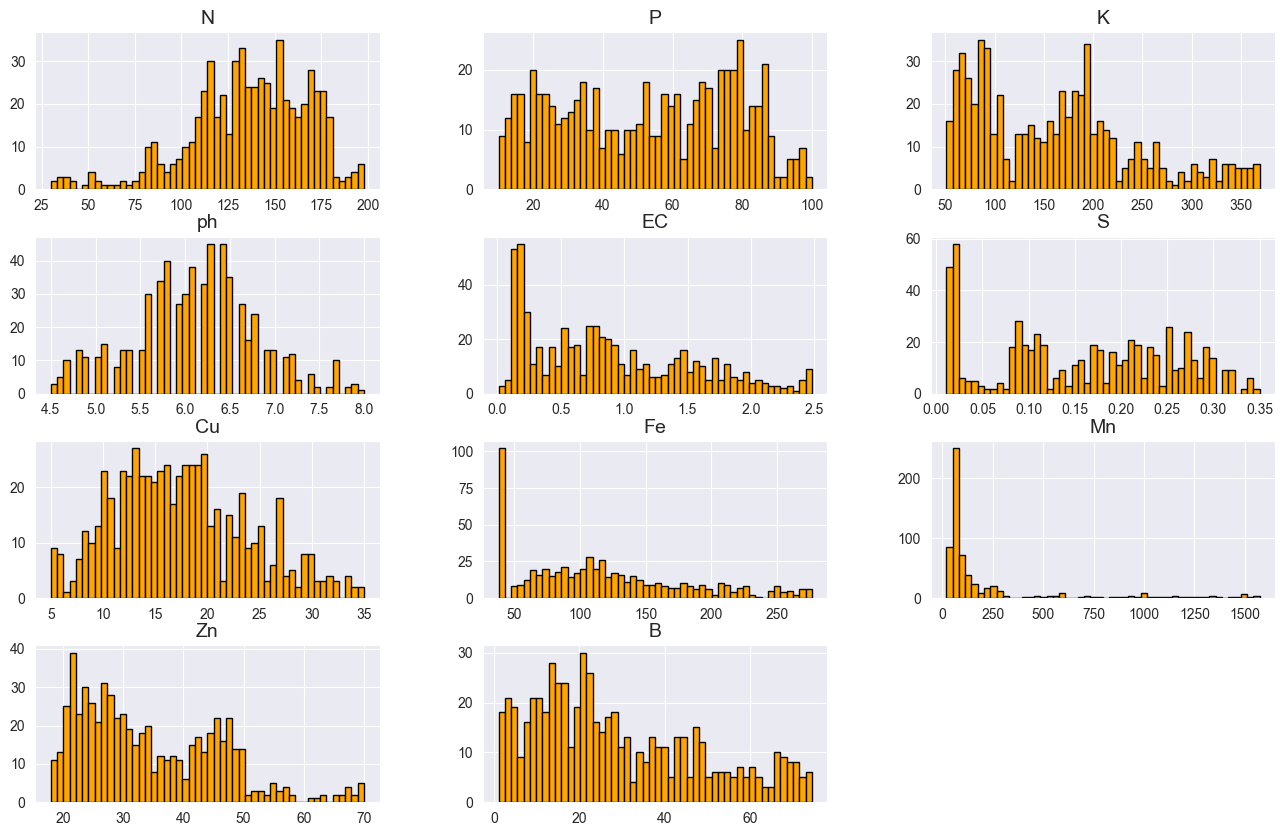

In [73]:
import matplotlib.pyplot as plt

features_histograms = clean_df.hist(bins=50, figsize=(16,10), color="orange", edgecolor="black")

for ax in features_histograms.flatten():
    ax.title.set_size(14)
    
plt.show()

# 9. Dataset crops distribution
Includes before and after cleanup

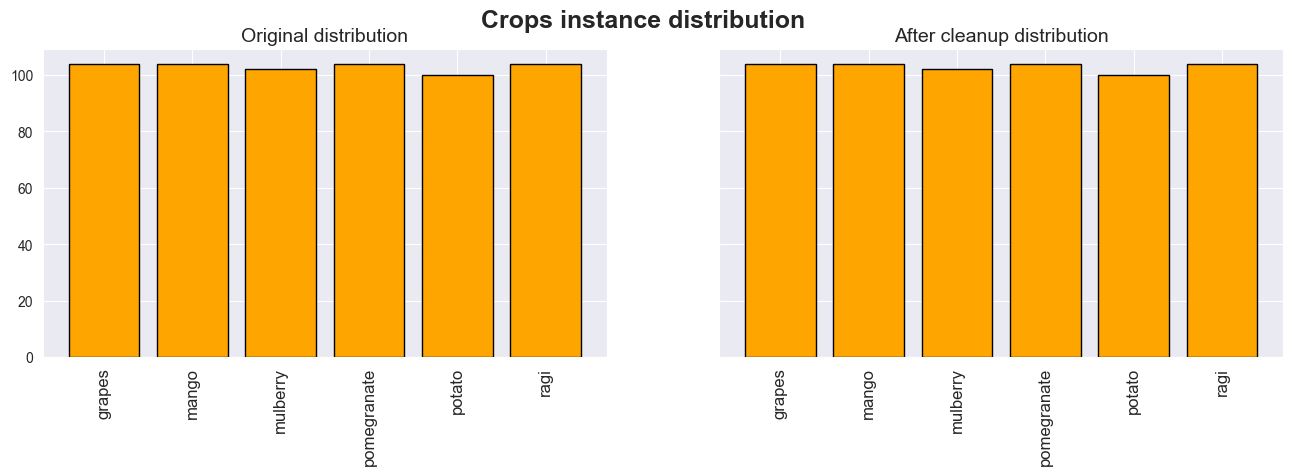

In [74]:
original_label_count = csv_df.label.value_counts().sort_index()
cleaned_label_count = clean_df.label.value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,4))

fig.suptitle("Crops instance distribution", fontsize=18, fontweight="bold")

ax1.bar(original_label_count.index, height=original_label_count.values, edgecolor="black", color="orange")
ax1.set_title("Original distribution", fontsize=14)
ax1.tick_params(axis="x", rotation=90, labelsize=12)

ax2.bar(cleaned_label_count.index, height=cleaned_label_count.values, edgecolor="black", color="orange")
ax2.set_title("After cleanup distribution", fontsize=14)
ax2.tick_params(axis="x", rotation=90, labelsize=12)

plt.show()

## 9.1 Side by side crops instances count

In [75]:
distribution_df = original_label_count.to_frame()
distribution_df.rename(columns={"count": "original_count"}, inplace=True)
distribution_df["cleaned_count"] = cleaned_label_count
print(distribution_df)

             original_count  cleaned_count
label                                     
grapes                  104            104
mango                   104            104
mulberry                102            102
pomegranate             104            104
potato                  100            100
ragi                    104            104


# 10. Scatter plots

In [76]:
import seaborn as sns

crops_palette = sns.color_palette("tab10", len(clean_df.label.unique()))

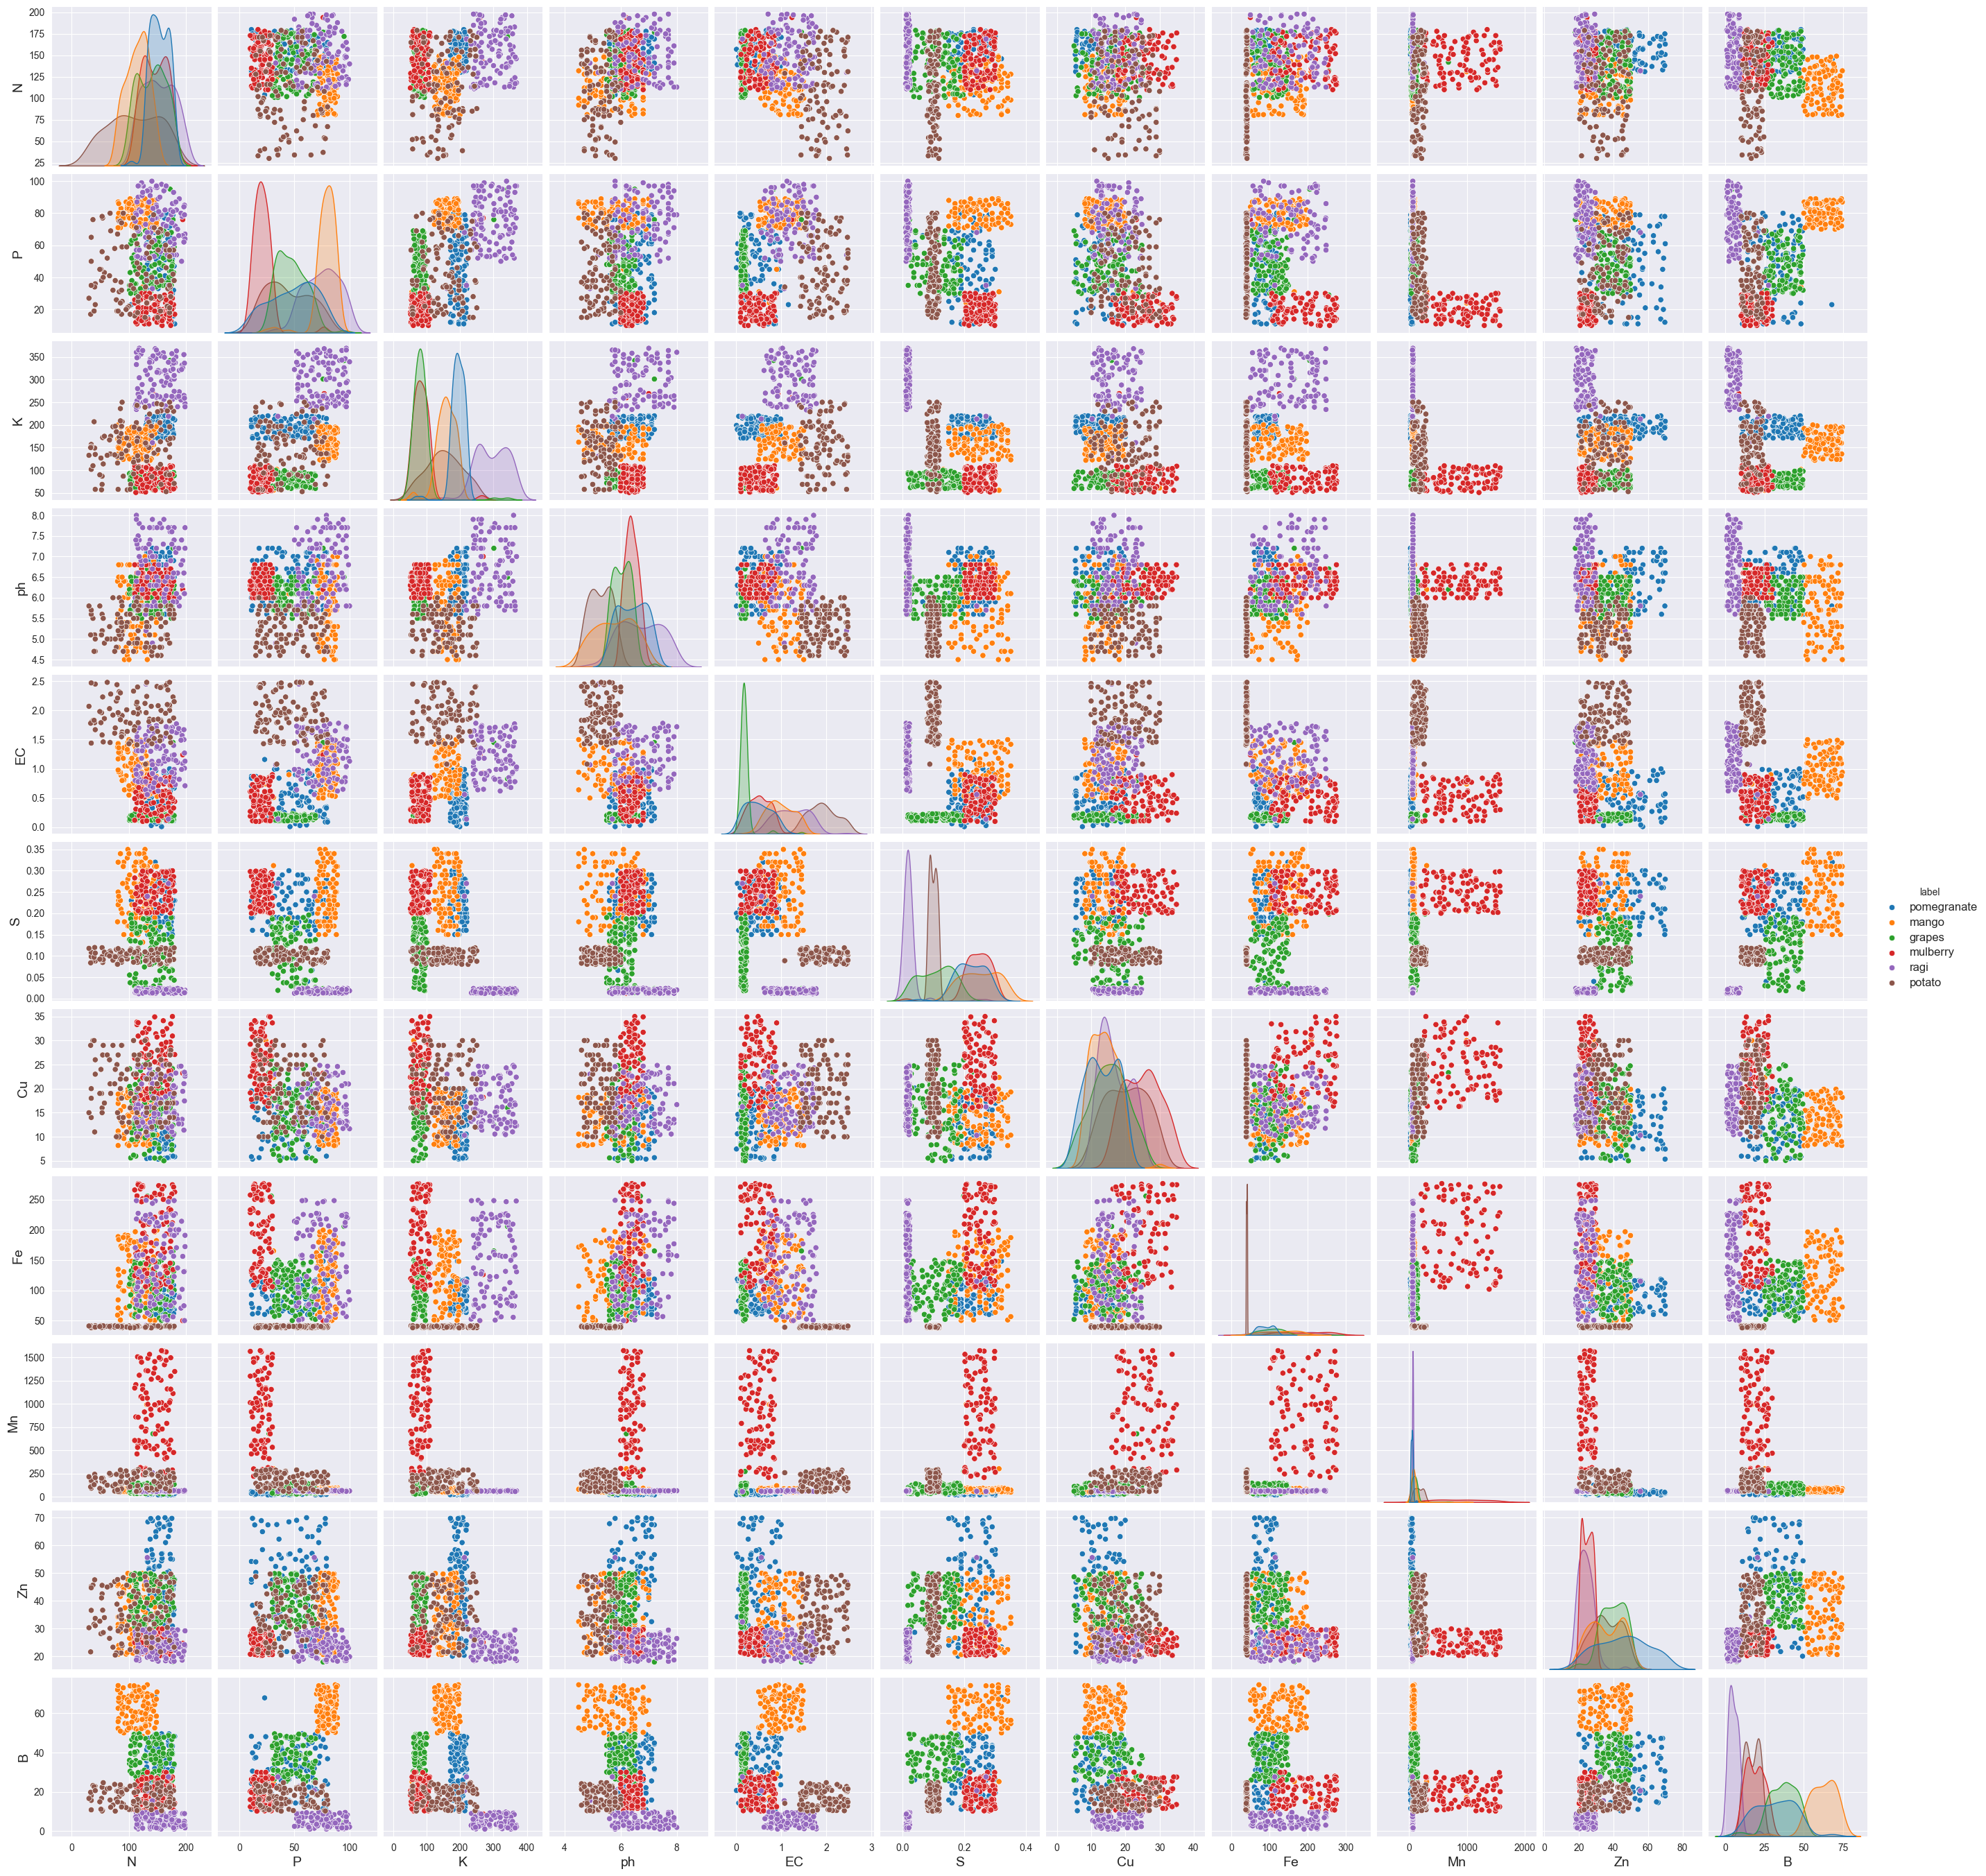

In [77]:
crops_pairplot = sns.pairplot(clean_df, hue="label", palette=crops_palette)
plt.setp(crops_pairplot.legend.get_texts(), fontsize="12")

for ax in crops_pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

plt.savefig(f"../Images/ScatterPlots_{dataset_name}.png")
plt.show()

## 10.1. Single scatter plot

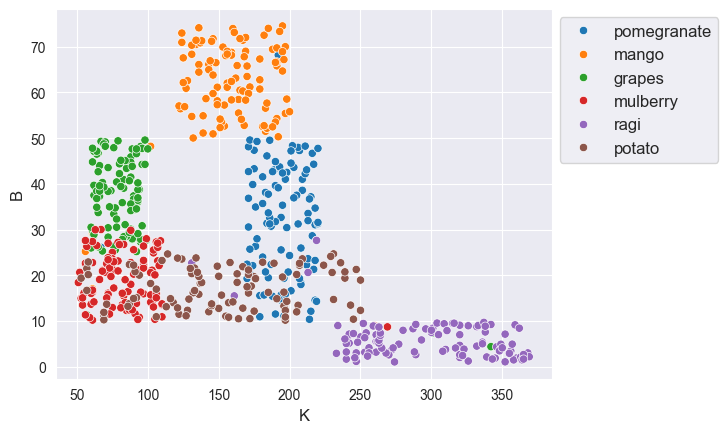

In [78]:
x_feature = "K"
y_feature = "B"

sp = sns.scatterplot(clean_df, x=x_feature, y=y_feature, hue="label", palette=crops_palette)
sp.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize="12")
sp.set_xlabel(x_feature, fontsize="12")
sp.set_ylabel(y_feature, fontsize="12")

plt.show()